Problem Statement:
The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

Breakdown of the Problem Statement:
Supervised machine learning problem.
The target value will be Item_Outlet_Sales.
Aim of the NoteBook:
The objective is to create a model that can predict the sales per product for each store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales

The Big Mart Sales dataset contains information on sales of products in various stores of the Big Mart chain. The dataset contains 12 variables, including both categorical and numerical data. Here's a summary of the variables in the Big Mart Sales dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filename='/content/Train.csv'
df = pd.read_csv(filename, index_col=0)

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Lets explore the DataFrame

In [ ]:
df.shape

(8523, 11)

In [ ]:
#finding NaN values
df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### so we have some nulls, we should do to deal with them
 

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.groupby('Item_Type').Item_Weight.agg([min, max, np.mean])

,min,max,mean
Item_Type,,,
Baking Goods,4.880,20.85,12.277108
Breads,4.635,20.85,11.346936
Breakfast,6.425,21.10,12.768202
Canned,4.615,21.35,12.305705
Dairy,4.805,20.70,13.426069
Frozen Foods,4.555,20.85,12.867061
Fruits and Vegetables,5.460,21.35,13.224769
Hard Drinks,4.610,19.70,11.400328
Health and Hygiene,5.175,21.25,13.142314


In [ ]:
df.groupby(['Item_Type', 'Item_Fat_Content']).mean()

<ipython-input-192-c5a2ee088b20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Item_Type', 'Item_Fat_Content']).mean()


Item_Weight  Item_Visibility    Item_MRP  \
Item_Type     Item_Fat_Content                                             
Baking Goods  LF                  12.052500         0.068426  115.641430   
              Low Fat             12.633128         0.066465  121.286145   
              Regular             11.976126         0.071573  133.311137   
              low fat             10.060000         0.048614  104.131575   
              reg                 12.825000         0.089004  111.424431   
...                                     ...              ...         ...   
Starchy Foods LF                  14.375000         0.067391  156.902489   
              Low Fat             13.669692         0.066966  158.575569   
              Regular             13.757200         0.069425  133.824861   
              low fat             14.150000         0.037877  124.004600   
              reg                 12.375833         0.062482  147.256086   

                                Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Type     Item_Fat_Content                                                
Baking Goods  LF                              1995.500000        1670.791810  
              Low Fat                         1997.491694        1781.871029  
              Regular                         1998.117647        2192.281401  
              low fat                         1995.000000        1345.581800  
              reg                             1999.153846        1089.504877  
...                                                   ...                ...  
Starchy Foods LF                              1998.111111        2466.419111  
              Low Fat                         1998.986111        2582.980347  
              Regular                         1998.694915        2141.867315  
              low fat                         1987.000000        1618.559800  
              reg                             1995.714286        2177.166000  

[70 rows x 5 columns]

In [ ]:
#filling the nan values.
group_means = df.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()
df.loc[df['Item_Weight'].isnull(), 'Item_Weight'] = df.loc[df['Item_Weight'].isnull(), ['Item_Type', 'Item_Fat_Content']].apply(lambda x: group_means[x['Item_Type'], x['Item_Fat_Content']], axis=1)

In [ ]:
df.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
(df['Item_Visibility']==0).sum()

526

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

### we fill NaN values of Outlet_Size with Mode Imputation

In [ ]:
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
df['Outlet_Size']

Item_Identifier
FDA15    Medium
DRC01    Medium
FDN15    Medium
FDX07    Medium
NCD19      High
          ...  
FDF22      High
FDS36    Medium
NCJ29     Small
FDN46    Medium
DRG01     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#replacing 2 identitical words into one word
df.replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'}, inplace=True)

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#use the correlation to find out which column affecting more
df.corrwith(df['Item_Outlet_Sales'])

<ipython-input-203-84f42a0ed7ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Item_Outlet_Sales'])


Item_Weight                  0.012432
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
dtype: float64

### Now, lets draw some graphs to understand dataframe more clear

<ipython-input-204-187655669e16>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'], bins=25)


Text(0.5, 1.0, 'Sales distribution')

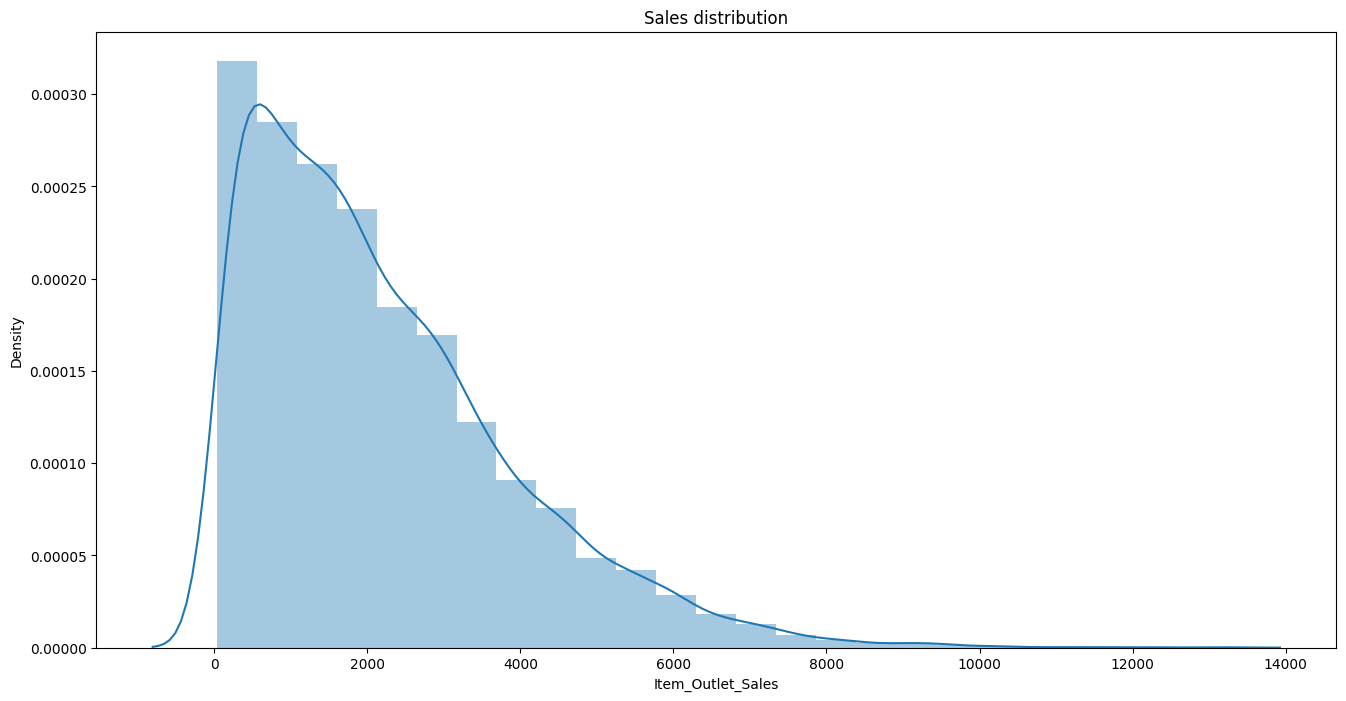

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.distplot(df['Item_Outlet_Sales'], bins=25)
plt.title("Sales distribution")

Text(0.5, 1.0, 'Outlet_Type and Item_Outlet_Sales')

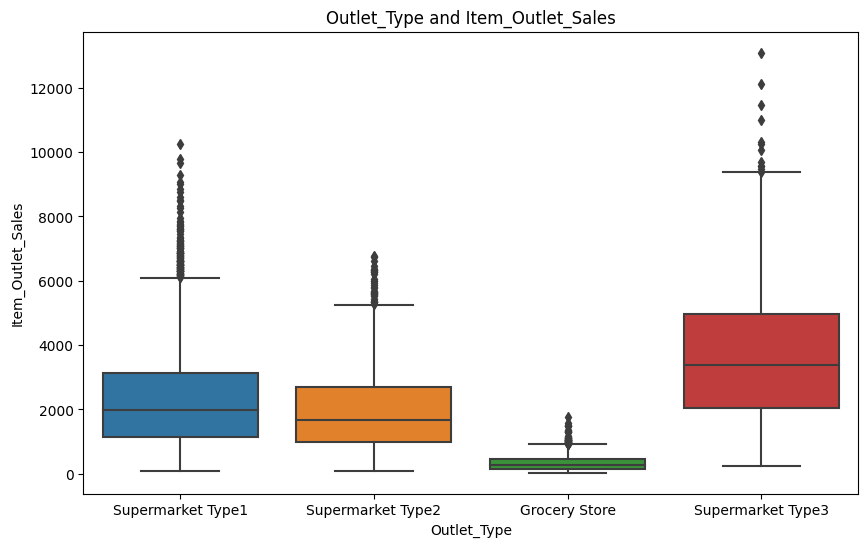

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title("Outlet_Type and Item_Outlet_Sales")

### Using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for y in columns:
     df[y] = labelencoder.fit_transform(df[y].values)
     

In [ ]:
df.drop(['Outlet_Identifier'], axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
DRC01,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
FDN15,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
FDX07,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
NCD19,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
FDF22,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
FDS36,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
NCJ29,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136


In [ ]:
X = df.drop('Item_Outlet_Sales', axis=1).values
y = df['Item_Outlet_Sales']

### Scaling data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Splitting data

In [ ]:
#Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
prediction = RF_model.predict(X_train)
prediction

array([ 520.768786, 1579.697054, 2437.633618, ..., 2535.273188,
       1242.502644, 2928.161768])

### this is final our guess with comparison with the real price

In [ ]:
pd.DataFrame({'Guess': prediction, 'Real Price':y_train})

,Guess,Real Price
Item_Identifier,,
DRM37,520.768786,591.2304
NCQ42,1579.697054,1017.3424
NCE54,2437.633618,2332.2974
NCQ41,3693.771846,3901.5880
FDR19,2627.346670,2770.3938
...,...,...
FDK21,507.119886,500.6816
FDS13,4962.713408,5299.7680
FDY19,2535.273188,2828.3184


In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(prediction,y_train)
wrong=np.sqrt(mse)
print(wrong)

425.2745791230239


In [ ]:
RF_accuracy = round(RF_model.score(X_train,y_train) * 100,2)
RF_accuracy

93.78

### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"RMSE: {rmse}")
print(f'mean: {mean}')

RMSE: 1127.9347582596201
mean: 802.7026629318935


In [ ]:
#Accuracy
accur = round(xgb.score(X_train,y_train) * 100,2)
accur

86.67

### GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_score = np.sqrt(mean_squared_error(y_test, gbr_pred))

print("RMSE (Gradient Boosting Regressor): ", gbr_score)

RMSE (Gradient Boosting Regressor):  1056.3519352269534


In [ ]:
#Accuracy
accur_gbr = round(gbr.score(X_train, y_train)*100,2)
accur_gbr

63.03

### so the final thought of the dataframe, I used Random Forest Regressor(93.7%), XGBRegressor(86.7%), GradientBoostingRegressor (63.3%) accuracy.

Random Forest Regressor is more efficeint among the regressors i used above,



In [223]:
import joblib


# Save the trained model as a .pkl file
joblib.dump(RF_model, 'model.pkl')

['model.pkl']